In [2]:
# Comment the following lines if you're not in colab:
from google.colab import drive
drive.mount('/content/drive')
# If you're in colab, cd to your own working directory here:
%cd ..//..//content//drive//MyDrive//Colab-Notebooks//HY-673-Tutorials//Tutorial-2

Mounted at /content/drive
/content/drive/MyDrive/Colab-Notebooks/HY-673-Tutorials/Tutorial-2


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
seed = 42
np.random.seed(seed)

## <u>Sample from a Univariate Normal Distribution</u>

In NumPy and PyTorch there are in-built functions `np.random.rand()` and `torch.randn()` to sample points from a standard normal distribution $z\sim\mathcal{N}(0, 1)$. As we've seen, it also has implementations where we can specify the mean and standard deviation for our distribution, e.g., `np.random.normal()`. In this notebook, we briefly talk about a critical step these function take internally, and we extend this concept for more than one dimensions.

Sampling from a normal random variable $x\sim\mathcal{N}(\mu, \sigma^{2})$ starting from $z\sim\mathcal{N}(0, 1)$ is easy and straightforward: We simply multiply the points sampled from $z$ by the desired standard deviation $\sigma$ (which is the square root of the variance $\sigma^2$) and add the desired mean value $\mu$, following the relation:
\begin{equation*}
x = \sigma z + \mu.
\end{equation*}


In [5]:
# Univariate:
mu = 10
variance = 4
stddev = np.sqrt(variance)
n_points = 1000

z = np.random.randn(n_points)
x = mu + stddev*z

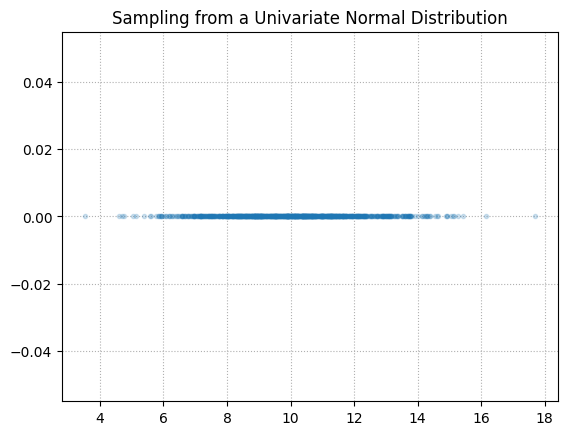

In [6]:
plt.figure()
plt.title("Sampling from a Univariate Normal Distribution")
plt.plot(x, np.zeros_like(z), '.', alpha=0.2)
plt.grid(linestyle=':')
plt.show()
plt.close()

## <u>Sample from a Multivariate Normal Distribution</u>

The process is similar for multivariate distribution. You can start by sampling $m$ points independently from a standard normal distribution. This is the same as sampling from a standard normal vector with $m$ independent components having mean $\mathbf{0}_{m}$ and covariance matrix $I_{m}$, $\mathbf{z}\sim \mathcal{N}(\mathbf{0}_{m},\mathbf{I}_{m})$.

Now, suppose that we want to obtain a multivariate normal random vector with mean $\mathbf{\mu}$ and covariance matrix $\mathbf{\Sigma}$, i.e., $\mathbf{x}\sim \mathcal{N}(\mathbf{\mu},\mathbf{\Sigma})$. In order to do that, we apply a linear transformation to the vector $\mathbf{z}$, similar to the univariate case:

\begin{equation*}
\mathbf{x} = \mathbf{L}\mathbf{z} + \mathbf{\mu}.
\end{equation*}

You probably recognize the pattern of summing $\mathbf{\mu}$, but, you're maybe wondering what exactly is $\mathbf{L}$. Well, in the univariate case we were multiplying $z$ by the standard deviation $\sigma$, which was the square root of the desired variance $\sigma^2$. Here, we would like to find a matrix $\mathbf{L}$, such that $\mathbf{LL}^{\top}=\mathbf{\Sigma}$, which is the "multivariate counterpart" of finding the square root. (In case you're a mathematician and you just got triggered by this layman's statement, there is a more rigorous explanation at the end of the notebook.)

If the desired vector has independent components, i.e., the covariance matrix is diagonal, this can be easily obtained by taking the square root of each component on the diagonal. Here is an example:

#### <u>Example - Independent Components Case</u>

To sample from a random vector:

\begin{equation*}
\mathbf{x} \sim \mathcal{N} \left( \left[ \begin{matrix} 6 \\ -10  \end{matrix} \right],
\left[ \begin{matrix} 4 & 0 \\ 0 & 9 \end{matrix} \right]  \right),
\end{equation*}

we first need to compute the matrix $\mathbf{L}$. Since we have a case where the components are independent, i.e., $\mathbf{\Sigma}$ is diagonal, then $\mathbf{L}$ is given by just taking the square root of $\mathbf{\Sigma}$. So, we'll get:

\begin{equation*}
\mathbf{L} = \left[ \begin{matrix} 2 & 0 \\ 0 & 3 \end{matrix} \right].
\end{equation*}

Now, we can apply the tranformation:
\begin{equation*}
\mathbf{x} = \mathbf{Lz} + \mathbf{\mu},
\end{equation*}

where $\mathbf{z}$ is sampled using `randn()`. This entire example in code:

In [7]:
# Multivariate with independent components:
mu = np.asarray([6, -10])
variances = np.asarray([4, 9])

sigma = np.diag(variances)
l_matrix = np.sqrt(sigma)
print(f"l_matrix =\n{l_matrix}")

n_points = 1000
z = np.random.randn(2, n_points)

x = l_matrix @ z + mu[:, None]
x = x.T  # typically the shape is (n_samples, n_components)

l_matrix =
[[2. 0.]
 [0. 3.]]


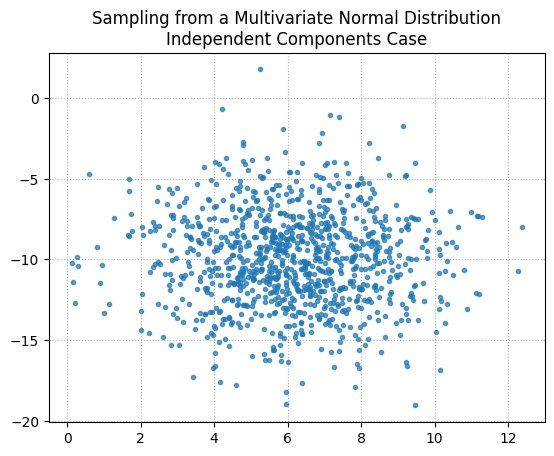

In [8]:
plt.figure()
plt.title("Sampling from a Multivariate Normal Distribution\nIndependent Components Case")
plt.plot(x[:, 0], x[:, 1], '.', alpha=0.7)
plt.grid(linestyle=':')
plt.show()
plt.close()

#### <u>Example - Non-Independent Components Case)</u>

When the components are not independent, i.e., $\mathbf{\Sigma}$ is not diagonal, we can't just take the square root of all the components. Therefore, we need another way to find a matrix $\mathbf{L}$ such that $\mathbf{LL}^{\top} = \mathbf{\Sigma}$.

Luckily, a smart mathematician has already found a solution for us: the **Cholesky decomposition** finds a matrix having precisely the property that we want. NumPy's implementation of this method is the function `np.linalg.cholesky()`:

In [9]:
# Multivariate with non-independent components
mu = np.asarray([6, -10])
sigma = np.asarray([[4, -3], [-3, 9]])

l_matrix = np.linalg.cholesky(sigma)
print(f"l_matrix =\n{l_matrix}")

n_points = 1000
z = np.random.randn(2, n_points)

x = l_matrix @ z + mu[:, None]
x = x.T  # typically the shape is (n_samples, n_components)

l_matrix =
[[ 2.          0.        ]
 [-1.5         2.59807621]]


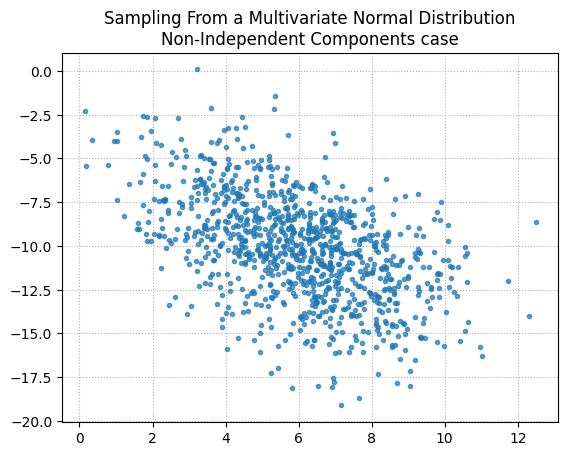

In [10]:
plt.figure()
plt.title("Sampling From a Multivariate Normal Distribution\nNon-Independent Components case")
plt.plot(x[:, 0], x[:, 1], '.', alpha=0.7)
plt.grid(linestyle=':')
plt.show()
plt.close()

Of course, NumPy already has a function that does everything we said:

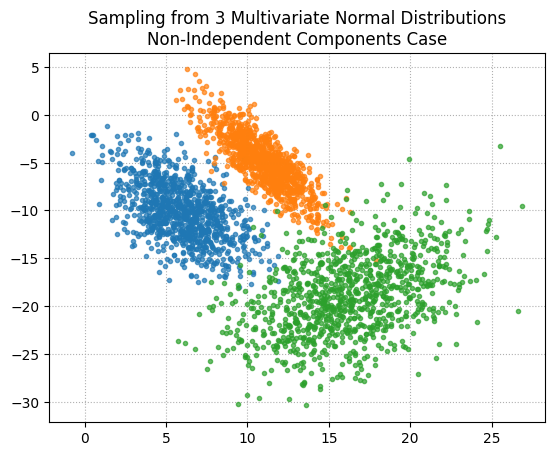

In [11]:
mean = np.asarray([6, -10])
cov = np.asarray([[4, -3], [-3, 9]])

x1 = np.random.multivariate_normal(mean, cov, (n_points))
x2 = np.random.multivariate_normal(mean + 5, cov - 1, (n_points))
x3 = np.random.multivariate_normal(mean + [10, -9], cov + 9, (n_points))

plt.figure()
plt.title("Sampling from 3 Multivariate Normal Distributions\nNon-Independent Components Case")
plt.plot(x1[:, 0], x1[:, 1], '.', alpha=0.7)
plt.plot(x2[:, 0], x2[:, 1], '.', alpha=0.7)
plt.plot(x3[:, 0], x3[:, 1], '.', alpha=0.7)
plt.grid(linestyle=':')
plt.show()
plt.close()

### <u>A more formal explanation</u>

We would like to obtain a random vector $\mathbf{x}\sim \mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})$ starting from a random vector $\mathbf{z}\sim \mathcal{N}(\mathbf{0}_{m}, \mathbf{I}_{m})$. The PDF of $\mathbf{z}$ is:

\begin{equation*}
p_{\mathbf{z}}(\mathbf{c}) = \frac{1}{(\sqrt{2\pi})^m} \exp\left( - \frac{c^{\top}c}{2} \right).
\end{equation*}

Let's consider the random vector $\mathbf{x}=\mathbf{L}\mathbf{z}+\mathbf{\mu}$. Notice that if $\mathbf{x}=\mathbf{a}$, then solving for $\mathbf{z}$ yields:

\begin{equation*}
\mathbf{z}=\mathbf{L}^{-1}((\mathbf{L}\mathbf{z}+\mathbf{\mu}) - \mathbf{\mu}) = \mathbf{L}^{-1}(\mathbf{a}-\mathbf{\mu}).
\end{equation*}

This implies that the PDF of $\mathbf{x}$ can be expressed in terms of the PDF of $\mathbf{z}$ using the change of variables technique:

\begin{align}
p_{\mathbf{x}}(\mathbf{a}) &= p_{\mathbf{z}}(\mathbf{L}^{-1}(\mathbf{a}-\mathbf{\mu})) |\mathbf{L}^{-1}| \\
&= \frac{1}{(\sqrt{2\pi})^m |\mathbf{L}|} \exp\left( - \frac{(\mathbf{L}^{-1}(\mathbf{a}-\mathbf{\mu}))^{\top}(\mathbf{L}^{-1}(\mathbf{a}-\mathbf{\mu}))}{2} \right) \\
&= \frac{1}{(\sqrt{2\pi})^m |\mathbf{L}|} \exp\left( - \frac{(\mathbf{a}-\mathbf{\mu})^{\top}(\mathbf{L}^{-1})^{\top}\mathbf{L}^{-1}(\mathbf{a}-\mathbf{\mu})}{2} \right) \\
&= \frac{1}{(\sqrt{2\pi})^m |\mathbf{L}|} \exp\left( - \frac{(\mathbf{a}-\mathbf{\mu})^{\top}(\mathbf{L}\mathbf{L}^{\top})^{-1}(\mathbf{a}-\mathbf{\mu})}{2} \right).
\end{align}

Step $3$ is a straightforward application of the Cauchy–Binet formula, whereas step $4$ uses the product of inverse matrices $B^{-1}A^{-1}=(AB)^{-1}$. The determinant of $\mathbf{L}$ is denoted as $|\mathbf{L}|$, for which holds the property $|\mathbf{L}^{-1}|=1/|\mathbf{L}|$.

Now, we know that the distribution of a multivariate normal vector with mean $\mathbf{\mu}$ and covariance matrix $\mathbf{\Sigma}$ has the following PDF:
\begin{equation*}
\frac{1}{(\sqrt{2\pi})^m \sqrt{|\mathbf{\Sigma}|}} \exp\left( - \frac{(\mathbf{a}-\mathbf{\mu})^{\top}\mathbf{\Sigma}^{-1}(\mathbf{a}-\mathbf{\mu})}{2} \right).
\end{equation*}

So, the only remaining step is choosing $\mathbf{L}$ such that $\mathbf{LL}^{\top}=\mathbf{\Sigma}$ using the Cholesky decomposition. Notice that this is possible only if $\mathbf{\Sigma}$ is positive semidefinite, which is a property that covariance matrices must always satisfy.  $\square$

